# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [71]:
%pip install matplotlib torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [73]:
batch_size = 80

### Carregamento, criação dataset e do dataloader

In [74]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 750

Dimensões dos dados de um minibatch: torch.Size([80, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [75]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 750


## Modelo

In [76]:
model = torch.nn.Linear(28*28, 10)

In [77]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.0540,  0.2924,  1.2071, -0.1356,  0.0088,  0.5146, -0.0686, -0.8532,
         -0.4100,  0.1329]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [78]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [79]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i+1}:{n_epochs} | batch: {k+1}/{len(loader_train)}')

Época: 1:5 | batch: 1/750
Época: 1:5 | batch: 2/750
Época: 1:5 | batch: 3/750
Época: 1:5 | batch: 4/750
Época: 1:5 | batch: 5/750
Época: 1:5 | batch: 6/750
Época: 1:5 | batch: 7/750
Época: 1:5 | batch: 8/750
Época: 1:5 | batch: 9/750
Época: 1:5 | batch: 10/750
Época: 1:5 | batch: 11/750
Época: 1:5 | batch: 12/750
Época: 1:5 | batch: 13/750
Época: 1:5 | batch: 14/750
Época: 1:5 | batch: 15/750
Época: 1:5 | batch: 16/750
Época: 1:5 | batch: 17/750
Época: 1:5 | batch: 18/750
Época: 1:5 | batch: 19/750
Época: 1:5 | batch: 20/750
Época: 1:5 | batch: 21/750
Época: 1:5 | batch: 22/750
Época: 1:5 | batch: 23/750
Época: 1:5 | batch: 24/750
Época: 1:5 | batch: 25/750
Época: 1:5 | batch: 26/750
Época: 1:5 | batch: 27/750
Época: 1:5 | batch: 28/750
Época: 1:5 | batch: 29/750
Época: 1:5 | batch: 30/750
Época: 1:5 | batch: 31/750
Época: 1:5 | batch: 32/750
Época: 1:5 | batch: 33/750
Época: 1:5 | batch: 34/750
Época: 1:5 | batch: 35/750
Época: 1:5 | batch: 36/750
Época: 1:5 | batch: 37/750
Época: 1:5

In [80]:
print('Final loss:', loss.data)

Final loss: tensor(0.2702)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

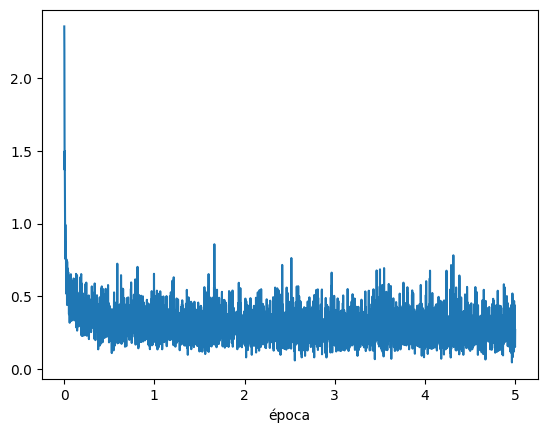

In [81]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

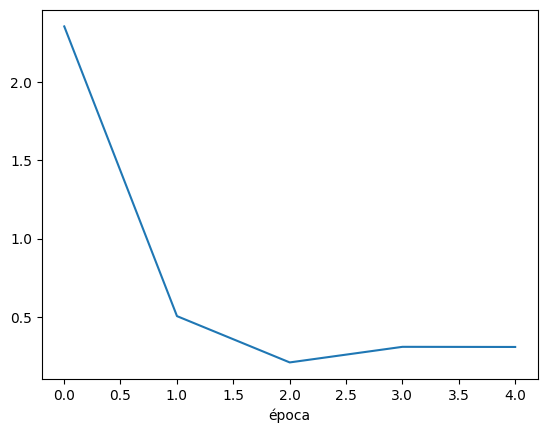

In [82]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
  - R: 600
2. Em uma época, quantos mini-batches existem?
  - R: 100
3. Qual é a definição de época?
  - R: quantidade de iterações para que o modelo percorra o dataset

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [83]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i+1}:{n_epochs} | batch: {k+1}/{len(loader_train)}')

Época: 1:5 | batch: 1/750
Época: 1:5 | batch: 2/750
Época: 1:5 | batch: 3/750
Época: 1:5 | batch: 4/750
Época: 1:5 | batch: 5/750
Época: 1:5 | batch: 6/750
Época: 1:5 | batch: 7/750
Época: 1:5 | batch: 8/750
Época: 1:5 | batch: 9/750
Época: 1:5 | batch: 10/750
Época: 1:5 | batch: 11/750
Época: 1:5 | batch: 12/750
Época: 1:5 | batch: 13/750
Época: 1:5 | batch: 14/750
Época: 1:5 | batch: 15/750
Época: 1:5 | batch: 16/750
Época: 1:5 | batch: 17/750
Época: 1:5 | batch: 18/750
Época: 1:5 | batch: 19/750
Época: 1:5 | batch: 20/750
Época: 1:5 | batch: 21/750
Época: 1:5 | batch: 22/750
Época: 1:5 | batch: 23/750
Época: 1:5 | batch: 24/750
Época: 1:5 | batch: 25/750
Época: 1:5 | batch: 26/750
Época: 1:5 | batch: 27/750
Época: 1:5 | batch: 28/750
Época: 1:5 | batch: 29/750
Época: 1:5 | batch: 30/750
Época: 1:5 | batch: 31/750
Época: 1:5 | batch: 32/750
Época: 1:5 | batch: 33/750
Época: 1:5 | batch: 34/750
Época: 1:5 | batch: 35/750
Época: 1:5 | batch: 36/750
Época: 1:5 | batch: 37/750
Época: 1:5

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

R: A medida que o tamanho do minibatch é aumentado, a evolução da perda no final de cada minibatch é mais linear

## Conclusões sobre os experimentos deste notebook
